# Profitable App Profiles for the App Store and Google Play Markets

<div>
<center><img src="Apple-and-Android.png" width="600"/></center>
</div>

# Table of Contents

1. [**Introduction**](#1)
* [Data Description](#1.1)
2. [**Loading the Data**](#2)
3. [**Data Cleaning**](#3)
* [Deleting Wrong Data](#3.1)
* [Removing Duplicate Entries](#3.2)
* [Removing Non-English Apps](#3.3)
* [Isolating Free Apps](#3.4)
4. [**Data Analysis**](#4)
* [Most Common Apps by Genre](#4.1)
    * [App Store](#4.1.1)
    * [Google Play](#4.1.2)
5. [**Conclusion**](#5)

<a id="1"></a>
# Introduction
I am working as a data analyst for a hypothetical company, that builds Android and iOS mobile apps. The company only builds apps for an *English-speaking* audience, that are *free* to download and install, and the main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. 

**Project Goal**
The goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users. 
<a id="1.1"></a>
## Data Description
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we will use the following datasets, which seem suitable for our purpose:
* A [data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately ten thousand Android apps from Google Play.
* A [data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing about approximately seven thousand iOS apps from the App Store.

Let's start by opening the two data sets and then continue with exploring the data.

<a id="2"></a>
# Loading the Data

In [1]:
import pandas as pd

# Load the android dataset
android = pd.read_csv('data/googleplaystore.csv')
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We see that the Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are: `App`, `Category`, `Reviews`, `Installs`, `Type`, `Price`, and `Genres`.

Let's check for missing values in our columns of interest.

In [3]:
android.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Most of the columns do not have missing values. `Rating` has the highest number of missing values accounting for about `13.6%`. 

Let's now look at the iOS Apps dataset.

In [4]:
ios = pd.read_csv('data/AppleStore.csv')
ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [5]:
ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

We have 7197 iOS apps in this data set, and the columns that seem interesting are: `track_name`, `currency`, `price`, `rating_count_tot`, `rating_count_ver`, and `prime_genre`. Not all column names are self-explanatory in this case, but details about each column can be found in the data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

In [6]:
ios.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

There are no missing values in the iOS apps dataset.

<a id="3"></a>
# Data Cleaning
Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:
* Remove non-English apps like `爱奇艺PPS -《欢乐颂2》电视剧热播`.
* Remove apps that aren't free.
<a id="3.1"></a>
## Deleting Wrong Data
The Google Play dataset has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that one of the [discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. Let's take a look at this row.

In [7]:
android.iloc[[10472, 5]] # Compare incorrect row and correct row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


The row `10472` corresponds to the app *Life Made WI-Fi Touchscreen Photo Frame* , and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the [discussions section](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), this problem is caused by a missing value in the `Category` column). As a consequence, we'll delete this row.

In [8]:
android = android.drop(10472)
print(len(android)) # verify the row is dropped

10840


<a id="3.2"></a>
## Removing Duplicate Entries
If we explore the Google Play data set long enough, we'll find some apps have more than one entry. There are `1181` apps which have duplicates.

In [9]:
android.duplicated('App').sum()

1181

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app.
Some of these rows are identical, for instance, for the app `Google Keep`, let's drop these duplicates:

In [10]:
android[android['App'] == 'Google Keep']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3467,Google Keep,PRODUCTIVITY,4.4,691474,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3507,Google Keep,PRODUCTIVITY,4.4,691474,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3545,Google Keep,PRODUCTIVITY,4.4,691474,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8636,Google Keep,PRODUCTIVITY,4.4,691474,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


In [11]:
# Remove the identical rows
android = android.drop_duplicates()
len(android)

10357

On the other hand,  examining the rows for an app such as Facebook, we notice that the main difference happens in the `Reviews` column. The different numbers show that the data was collected at different times. 

We will use this information to build a criterion for removing the duplicates. *The higher the number of reviews, the more recent the data should be*. We'll only keep the rows with the highest number of reviews and remove the other entries for any given group.

In [12]:
android[android['App'] == 'Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


We will use a pivot table to filter the data frame on the rows with the maximum number of reviews. The resulting data frame is merged with the `android` data frame, using `App` and `Reviews` columns, to give us the rows in both data frames.

In [13]:
df_max_reviews = android.groupby('App')['Reviews'].max().reset_index()
df_merged = pd.merge(android, df_max_reviews, on=['App', 'Reviews'])
len(df_merged)

9665

We still have duplicates in our data frame, let's take a closer look at the duplicates we have left.

In [14]:
df_merged[df_merged['App'] == 'YouTube Gaming']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
664,YouTube Gaming,ENTERTAINMENT,4.2,130549,Varies with device,"5,000,000+",Free,0,Teen,Entertainment,"June 27, 2018",2.08.78.2,4.1 and up
665,YouTube Gaming,FAMILY,4.2,130549,Varies with device,"5,000,000+",Free,0,Teen,Entertainment,"June 27, 2018",2.08.78.2,4.1 and up


In [15]:
df_merged[df_merged['App'] == 'osmino Wi-Fi: free WiFi']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2460,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up
2461,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


Taking a closer look at these rows, we notice two differences that occur in the `Category` and the `Last Updated` columns. 

[Google Play](https://www.lowyat.net/2015/64130/googles-new-family-category-now-on-play-store-makes-it-easier-to-discover-apps-for-kids/) introduced a new `Family` category, making it easier to discover Apps for kids. This explains why we have different categories for the same app. 

Considering this, *we will retain the last row of the duplicate rows, since it contains the most recent date and the updated family category for kids apps.* 

In [16]:
# The first occurrence of duplicate rows 
duplicates = df_merged[df_merged.duplicated('App', keep='last')] # check in the app column, keeing the last record
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
569,Learn C++,EDUCATION,4.6,73404,5.3M,"1,000,000+",Free,0,Everyone,Education,"December 25, 2017",4.5.2,4.0 and up
631,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44M,"1,000+",Paid,$5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
664,YouTube Gaming,ENTERTAINMENT,4.2,130549,Varies with device,"5,000,000+",Free,0,Teen,Entertainment,"June 27, 2018",2.08.78.2,4.1 and up
1427,Candy Bomb,GAME,4.4,42145,20M,"10,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
1995,Target - now with Cartwheel,SHOPPING,4.1,68406,24M,"10,000,000+",Free,0,Everyone,Shopping,"July 25, 2018",6.25.0+1906001476,5.0 and up
2460,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up


In [17]:
# Drop the duplicate rows
android_clean = df_merged.drop(duplicates.index)

To verify that we have removed all the duplicate rows, we will subtract the original rows we began with, `10840` and subtract the number of duplicate rows we identified in the beginning, `1181`. Having removed the duplicates, we should have `9659` rows left in our data frame. 


In [18]:
len(android_clean)

9659

We have `9659` rows, just as expected.

<a id="3.3"></a>
## Removing Non-English Apps
Exploring the data sets enough, we notice that the names of some of the apps suggenst they are not directed toward an English-speaking audience:

In [19]:
print(ios.iloc[813].track_name)
print(ios.iloc[6731].track_name)

print(android_clean.iloc[5291].App)
print(android_clean.iloc[5293].App)

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
あなカレ【BL】無料ゲーム
감성학원 BL 첫사랑


We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

we will use a custom function which uses the built-in ord() function to find out the corresponding encoding number of each character. We'll only remove an app if its name has more than 3 non-ASCII characters:

In [20]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

In [21]:
ios_clean = ios[ios['track_name'].apply(is_english)]
ios_clean.shape

(6183, 16)

In [22]:
android_clean = android_clean[android_clean['App'].apply(is_english)]
android_clean.shape

(9614, 13)

We are left with `9614` Android apps and `6183` iOS apps.

<a id="3.4"></a>
## Isolating the Free Apps
As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. 

In [23]:
android_final = android_clean[android_clean['Price'] == '0']
len(android_final)

8862

In [24]:
ios_final = ios_clean[ios_clean['price'] == 0.0]
len(ios_final)

3222

We're left with 8862 Android apps and 3222 iOS apps, which should be enough for our analysis.

<a id="4"></a>
# Data Analysis 
Our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:
1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

We need to find app profiles that are successful on both markets. Let's begin the analysis by getting a sense of what are the most common genres for each market. 
<a id="4.1"></a>
## Most Common Apps by Genre
For this, we'll build frequency tables for `prime_genre` column of the App Store data set, and the `Genres` and `Category` columns of the Google Play data set.      
Let's start with the App Store data set. 

In [25]:
def tally(col):
    
    '''count the number of apps in a given category, compute
    the percentage of apps in the category.
    Returns a dataframe.
    '''
    
    df = pd.DataFrame(col.value_counts(ascending=True)
                 .reset_index())
    df.set_axis(['Genre', 'total_apps'], axis='columns', inplace=True)
    # Add a column with percentages
    df['percentage'] = round(df['total_apps'] / 
                          sum(df['total_apps']) * 100,2)
    return df
    

In [26]:
ios_tally = tally(ios_final['prime_genre'])
ios_tally

,Genre,total_apps,percentage
0,Catalogs,4,0.12
1,Navigation,6,0.19
2,Medical,6,0.19
3,Book,14,0.43
4,Business,17,0.53
5,Reference,18,0.56
6,Food & Drink,26,0.81
7,Weather,28,0.87
8,Finance,36,1.12
9,Travel,40,1.24


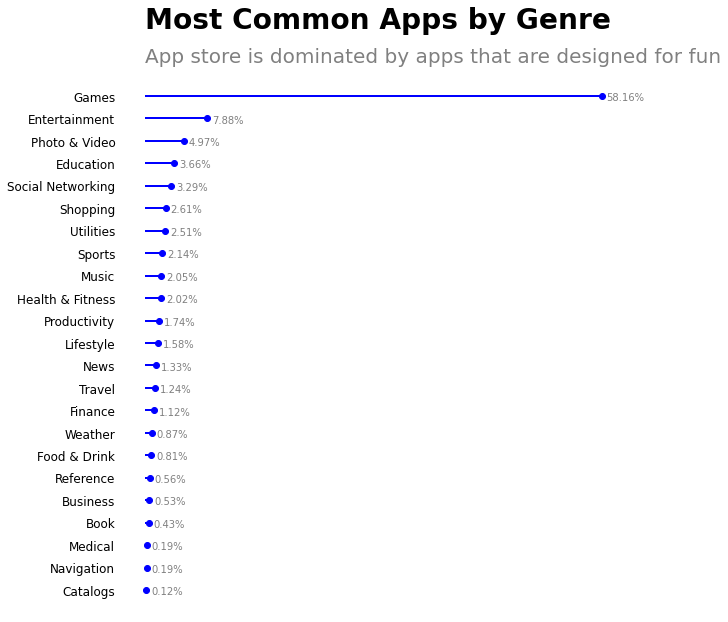

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(9,10))

#print(ax.get_xticks())
#print(ax.get_yticks())

# Remove spines
for key in ax.spines.keys():
    ax.spines[key].set_visible(False)
    
# plot apps count
ax.hlines(y=ios_tally['Genre'],
         xmin=0,
         xmax=ios_tally['total_apps'],
         color='blue',
         linewidth=2)
ax.scatter(y=ios_tally['Genre'],
          x=ios_tally['total_apps'],
          color='blue')
# move x axis to the top
ax.xaxis.tick_top()

# remove the ticks
ax.tick_params(axis='y', left=False, labelsize=12)
ax.tick_params(axis='x', top=False, labeltop=False)

# annotate on each bar
for i in range(len(ios_tally)):
    ax.text(s=str(ios_tally.iloc[i,2])+'%',
            x=ios_tally.iloc[i,1]+20,
            y=i-0.2,
            color='grey')
    
# add title and subtitle
ax.text(x=-0.8,y=25, s='Most Common Apps by Genre', size=28, weight='bold')
ax.text(x=-0.8,y=23.5, s='App store is dominated by apps that are designed for fun', size=20, color='grey')

plt.show()

We can see that among the free English apps, more than a half (58.16%) are `games`. `Entertainment` apps are close to 8%, followed by `photo and video` apps, which are close to 5%. Only 3.66% of the apps are designed for `education`, followed by `social networking` apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the Genres and Category columns of the Google Play data set (two columns which seem to be related).


In [28]:
android_tally_genre = tally(android_final['Genres']) # genre
android_tally_genre

,Genre,total_apps,percentage
0,Casual;Music & Video,1,0.01
1,Entertainment;Education,1,0.01
2,Health & Fitness;Action & Adventure,1,0.01
3,Communication;Creativity,1,0.01
4,Video Players & Editors;Creativity,1,0.01
...,...,...,...
110,Lifestyle,345,3.89
111,Business,407,4.59
112,Education,474,5.35
113,Entertainment,538,6.07


In [29]:
android_tally_cat = tally(android_final['Category']) # category
android_tally_cat

,Genre,total_apps,percentage
0,BEAUTY,53,0.60
1,COMICS,55,0.62
2,ART_AND_DESIGN,57,0.64
3,PARENTING,58,0.65
4,EVENTS,63,0.71
5,WEATHER,71,0.80
6,HOUSE_AND_HOME,73,0.82
7,AUTO_AND_VEHICLES,82,0.93
8,LIBRARIES_AND_DEMO,83,0.94
9,ENTERTAINMENT,84,0.95


The difference between the `Genres` and the `Category` columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

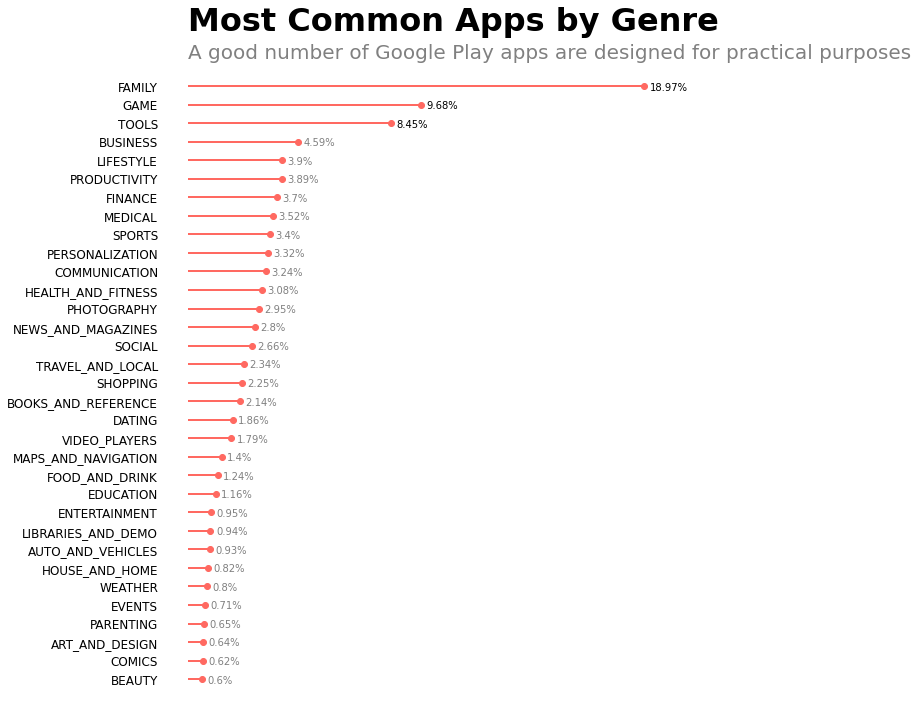

In [30]:
fig, ax = plt.subplots(figsize=(9,12))

#print(ax.get_xticks())
#print(ax.get_yticks())

# Remove spines
for key in ax.spines.keys():
    ax.spines[key].set_visible(False)
    
# plot apps count
ax.hlines(y=android_tally_cat['Genre'],
         xmin=0,
         xmax=android_tally_cat['total_apps'],
         color='#ff6961',
         linewidth=2)
ax.scatter(y=android_tally_cat['Genre'],
          x=android_tally_cat['total_apps'],
          color='#ff6961')
# move x axis to the top
ax.xaxis.tick_top()

# remove the ticks
ax.tick_params(axis='y', left=False, labelsize=12)
ax.tick_params(axis='x', top=False, labeltop=False)
    
# Highlight the top genres
top_genres = [android_tally_cat.iloc[i,0] for i in range(len(android_tally_cat)) if android_tally_cat.iloc[i,1] > 730]
palette = ['black' if android_tally_cat.iloc[i,0] in top_genres else'grey' for i in range(len(android_tally_cat))]

# annotate on each bar
for i in range(len(android_tally_cat)):
    ax.text(s=str(android_tally_cat.iloc[i,2])+'%',
            x=android_tally_cat.iloc[i,1]+20,
            y=i-0.2,
            color=palette[i])
    
# add title and subtitle
ax.text(x=-0.8,y=35, s='Most Common Apps by Genre', size=32, weight='bold')
ax.text(x=-0.8,y=33.5, s='A good number of Google Play apps are designed for practical purposes', size=20, color='grey')

plt.show()

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). As we saw earlier, the family category (which accounts for almost 19% of the apps) means mostly games for kids.

**Insights:**
1. `App Store` is **dominated** by apps designed for `fun`.
2. `Google Play` shows a more **balanced landscape** of both `practical` and for-`fun` apps. 

Now we'd like to get an idea about the kind of apps that have most users.

<a id="4.1.1"></a>
### Most Popular Apps by Genre on the App Store
One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the `Google Play` data set, we can find this information in the `Installs` column, but for the `App Store` data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

Let's calculate the average number of user ratings per app genre on the App Store:

In [31]:
import numpy as np

# Create a pivot table of average ratings by genre
pv_ios = ios_final.pivot_table(values='rating_count_tot', index='prime_genre', aggfunc=np.mean)
pv_ios.sort_values(by='rating_count_tot',ascending=False).reset_index()

,prime_genre,rating_count_tot
0,Navigation,86090.333333
1,Reference,74942.111111
2,Social Networking,71548.349057
3,Music,57326.530303
4,Weather,52279.892857
5,Book,39758.500000
6,Food & Drink,33333.923077
7,Finance,31467.944444
8,Photo & Video,28441.543750
9,Travel,28243.800000


On average, `navigation` apps have the highest number of user reviews, but this figure is heavily influenced by `Waze` and `Google Maps`, which have close to half a million user reviews together:

In [32]:
ios_final[ios_final['prime_genre'] == 'Navigation'][['track_name', 'rating_count_tot']]

,track_name,rating_count_tot
49,"Waze - GPS Navigation, Maps & Real-time Traffic",345046
130,Google Maps - Navigation & Transit,154911
881,Geocaching®,12811
1633,CoPilot GPS – Car Navigation & Offline Maps,3582
3987,ImmobilienScout24: Real Estate Search in Germany,187
6033,Railway Route Search,5


The same pattern applies to `social networking` apps, where the average number is heavily influenced by a few giants like `Facebook`, `Pinterest`, `Skype`, etc. Same applies to `music` apps, where a few big players like `Pandora`, `Spotify`, and `Shazam` heavily influence the average number.

In [33]:
ios_final[ios_final['prime_genre'] == 'Social Networking'][['track_name', 'rating_count_tot']].head()

,track_name,rating_count_tot
0,Facebook,2974676
5,Pinterest,1061624
43,Skype for iPhone,373519
48,Messenger,351466
51,Tumblr,334293


In [34]:
ios_final[ios_final['prime_genre'] == 'Music'][['track_name', 'rating_count_tot']].head()

,track_name,rating_count_tot
4,Pandora - Music & Radio,1126879
8,Spotify Music,878563
35,"Shazam - Discover music, artists, videos & lyrics",402925
60,iHeartRadio – Free Music & Radio Stations,293228
151,SoundCloud - Music & Audio,135744


Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. 

`Reference` apps have 74,942 user ratings on average, but it's actually the `Bible` and `Dictionary.com` which skew up the average rating:

In [35]:
ios_final[ios_final['prime_genre'] == 'Reference'][['track_name', 'rating_count_tot']].head(16)

,track_name,rating_count_tot
6,Bible,985920
90,Dictionary.com Dictionary & Thesaurus,200047
335,Dictionary.com Dictionary & Thesaurus for iPad,54175
551,Google Translate,26786
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418
738,New Furniture Mods - Pocket Wiki & Game Tools ...,17588
757,Merriam-Webster Dictionary,16849
913,Night Sky,12122
1106,City Maps for Minecraft PE - The Best Maps for...,8535
1451,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,4693


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* `Weather apps` — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

* `Food and drink` — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

* `Finance apps` — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

<a id="4.1.2"></a>
### Most Popular Apps by Genre on Google Play
For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [36]:
android_final['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '500,000,000+', '500+',
       '100+', '50+', '10+', '1+', '5+', '0+', '0'], dtype=object)

One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.     
Let's clean this column to have each install number as `float`.

In [37]:
pd.set_option('mode.chained_assignment', None)
install_floats = android_final['Installs'].astype(str).str.replace(',', '').str.replace('+','').astype(float)
android_final['installs_float'] = install_floats

In [38]:
pv_android = android_final.pivot_table(values='installs_float', index='Category', aggfunc=np.mean)
pv_android.sort_values(by='installs_float',ascending=False).reset_index()

,Category,installs_float
0,COMMUNICATION,3.845612e+07
1,VIDEO_PLAYERS,2.472787e+07
2,SOCIAL,2.325365e+07
3,PHOTOGRAPHY,1.780563e+07
4,PRODUCTIVITY,1.678733e+07
5,GAME,1.556745e+07
6,TRAVEL_AND_LOCAL,1.398408e+07
7,ENTERTAINMENT,1.171976e+07
8,TOOLS,1.068230e+07
9,NEWS_AND_MAGAZINES,9.549178e+06


On average, `communication` apps have the most installs: 38,456,120. This number is heavily skewed up by a few apps that have over one billion installs (`WhatsApp`, `Facebook Messenger`, `Skype`, `Google Chrome`, `Gmail`, and `Hangouts`), and a few others with over 100 and 500 million installs:

In [39]:
android_final[(android_final['Category'] == 'COMMUNICATION') & 
               ((android_final['Installs'] == '1,000,000,000+')| 
                (android_final['Installs'] == '500,000,000+'))][['App', 'Installs']]

,App,Installs
279,WhatsApp Messenger,"1,000,000,000+"
296,Google Duo - High Quality Video Calls,"500,000,000+"
304,Messenger – Text and Video Chat for Free,"1,000,000,000+"
305,imo free video calls and chat,"500,000,000+"
308,Skype - free IM & video calls,"1,000,000,000+"
316,LINE: Free Calls & Messages,"500,000,000+"
320,Google Chrome: Fast & Secure,"1,000,000,000+"
324,UC Browser - Fast Download Private & Secure,"500,000,000+"
347,Gmail,"1,000,000,000+"
359,Hangouts,"1,000,000,000+"


We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like `Youtube`, `Google Play Movies & TV`, or `MX Player`. The pattern is repeated for social apps (where we have giants like `Facebook`, `Instagram`, `Google+`, etc.), photography apps (`Google Photos` and other popular photo editors), or productivity apps (`Microsoft Word`, `Dropbox`, `Google Calendar`, `Evernote`, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:


In [40]:
android_final[android_final['Category'] == 'BOOKS_AND_REFERENCE'][['App', 'Installs']]

,App,Installs
135,E-Book Read - Read Book for free,"50,000+"
136,Download free book with green book,"100,000+"
137,Wikipedia,"10,000,000+"
138,Cool Reader,"10,000,000+"
139,Free Panda Radio Music,"100,000+"
...,...,...
9639,Golden Dictionary (FR-AR),"500,000+"
9643,Fanfic-FR,"5,000+"
9653,Bulgarian French Dictionary Fr,"10,000+"
9657,Chemin (fr),"1,000+"


The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [41]:
android_final[(android_final['Category'] == 'BOOKS_AND_REFERENCE') & 
               ((android_final['Installs'] == '1,000,000,000+')| 
                (android_final['Installs'] == '100,000,000+'))][['App', 'Installs']]

,App,Installs
144,Google Play Books,"1,000,000,000+"
2987,Bible,"100,000,000+"
3096,Amazon Kindle,"100,000,000+"
3660,Wattpad 📖 Free Books,"100,000,000+"
4548,Audiobooks from Audible,"100,000,000+"


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [42]:
android_final[(android_final['Category'] == 'BOOKS_AND_REFERENCE') & 
               ((android_final['Installs'] == '1,000,000+')| 
                (android_final['Installs'] == '5,000,000+')|
                (android_final['Installs'] == '10,000,000+')|                
                (android_final['Installs'] == '50,000,000+'))][['App', 'Installs']]

,App,Installs
137,Wikipedia,"10,000,000+"
138,Cool Reader,"10,000,000+"
140,Book store,"1,000,000+"
141,FBReader: Favorite Book Reader,"10,000,000+"
143,Free Books - Spirit Fanfiction and Stories,"1,000,000+"
145,AlReader -any text book reader,"5,000,000+"
148,FamilySearch Tree,"1,000,000+"
149,Cloud of Books,"1,000,000+"
151,ReadEra – free ebook reader,"1,000,000+"
153,Ebook Reader,"5,000,000+"


This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.     
It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

<a id="5"></a>
# Conclusion
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc